# Purpose

This notebook demonstrates the model experimentation and finalization. 

## Imports

In [1]:
import os
import os.path as op
import shutil

# standard third party imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# impute missing values
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from category_encoders import TargetEncoder


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
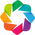

/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/core/utils.py:29: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
/home/srimanishgouds/miniforge3/envs/mle-core-dev/lib/python3.10/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [2]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, string_cleaning,
    get_package_path, display_as_tabs, save_pipeline, load_pipeline, initialize_environment,
    load_dataset, save_dataset, DEFAULT_ARTIFACTS_PATH
)
import warnings
from numba import NumbaDeprecationWarning

import ta_lib.eda.api as eda
from xgboost import XGBRegressor
from ta_lib.regression.api import SKLStatsmodelOLS
from ta_lib.regression.api import RegressionComparison, RegressionReport
import ta_lib.reports.api as reports
from ta_lib.data_processing.api import Outlier


In [3]:
%load_ext autoreload
%autoreload 2

In [100]:
import warnings
from numba import NumbaDeprecationWarning
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(
    "ignore",
    message="pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.",
    category=FutureWarning,
)
warnings.filterwarnings(
    "ignore",
    message="pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.",
    category=FutureWarning,
)
warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

In [5]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, string_cleaning,
    get_package_path, display_as_tabs, save_pipeline, load_pipeline, initialize_environment, list_datasets, 
    load_dataset, save_dataset, DEFAULT_ARTIFACTS_PATH
)

import ta_lib.eda.api as eda
from xgboost import XGBRegressor
from ta_lib.regression.api import SKLStatsmodelOLS
from ta_lib.regression.api import RegressionComparison, RegressionReport
import ta_lib.reports.api as reports
from ta_lib.data_processing.api import Outlier
from datetime import timedelta

initialize_environment(debug=False, hide_warnings=True)

# Initialization

In [6]:
artifacts_folder = DEFAULT_ARTIFACTS_PATH

In [7]:
from pprint import pprint
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)
pprint(list_datasets(context))

['/raw/FnB/google_search_data',
 '/raw/FnB/product_manufacturer_list',
 '/raw/FnB/sales_data',
 '/raw/FnB/social_media_data',
 '/raw/FnB/theme_list',
 '/raw/FnB/theme_product_list',
 '/cleaned/FnB/google_search_data',
 '/cleaned/FnB/product_manufacturer_list',
 '/cleaned/FnB/sales_data',
 '/cleaned/FnB/social_media_data',
 '/cleaned/FnB/theme_list',
 '/cleaned/FnB/theme_product_list',
 '/train/FnB/features',
 '/train/FnB/target',
 '/test/FnB/features',
 '/test/FnB/target',
 '/processed/FnB/client_data',
 '/score/FnB/output']


In [8]:
sales_data_clean = load_dataset(context, 'cleaned/FnB/sales_data')
product_manufacturer_list_clean = load_dataset(context, 'cleaned/FnB/product_manufacturer_list')
google_search_data_clean = load_dataset(context, 'cleaned/FnB/google_search_data')
social_media_data_clean = load_dataset(context, 'cleaned/FnB/social_media_data')
Theme_list_clean = load_dataset(context, 'cleaned/FnB/theme_list')
Theme_product_list_clean = load_dataset(context, 'cleaned/FnB/theme_product_list')

In [9]:
google_search_data_clean["date"]= pd.to_datetime(google_search_data_clean["date"])
google_search_data_clean['month'] = google_search_data_clean['date'].dt.month
google_search_data_clean['month_name'] = google_search_data_clean['date'].dt.month_name().str[0:3]
google_search_data_clean['week_number']=pd.Series(google_search_data_clean['date']+timedelta(1)).dt.isocalendar().week

In [10]:
social_media_data_clean['date'] = pd.to_datetime(social_media_data_clean['date'])
social_media_data_clean['year'] = social_media_data_clean['date'].dt.year
social_media_data_clean['month'] = social_media_data_clean['date'].dt.month
social_media_data_clean['month_name'] = social_media_data_clean['date'].dt.month_name().str[0:3]

social_media_data_clean['week_number']=pd.Series(social_media_data_clean['date']+timedelta(1)).dt.isocalendar().week

In [11]:
sales_data_clean['date'] = pd.to_datetime(sales_data_clean['date'])
sales_data_clean['year'] = sales_data_clean['date'].dt.year
sales_data_clean['week_number'] = sales_data_clean['date'].dt.isocalendar().week
sales_data_clean['month'] = sales_data_clean['date'].dt.month
sales_data_clean['month_name'] = sales_data_clean['date'].dt.month_name().str[0:3]


In [12]:
google_weekly = google_search_data_clean.groupby(['claim_id','week_number','year'])['search_volume'].sum().reset_index().sort_values(by=['week_number','year'] ,ascending = [True,True])

In [13]:
social_media_weekly = social_media_data_clean.groupby(['claim_id','week_number','year'])['total_post'].sum().reset_index().sort_values(by=['week_number','year'] ,ascending = [True,True])

In [14]:
sales_weekly = sales_data_clean.groupby(['product_id', 'week_number', 'year', 'date'])[
        ['sales_dollars_value', 'sales_units_value', 'sales_lbs_value']
    ].sum().reset_index().sort_values(by=['week_number', 'year'], ascending=[True, True])

- We are joining google_weekly & social_media_weekly data by outer join because if for one claim id, any post was not posted in social media for any particular week, still their search value can exist. 

In [15]:
google_social_merge = google_weekly.merge(social_media_weekly, left_on=['claim_id','week_number','year'], right_on=['claim_id','week_number','year'], how= 'outer')
google_social_merge.fillna(0, inplace = True)

In [16]:
sales_claim_merge = pd.merge(sales_weekly, Theme_product_list_clean, on=['product_id'], how= 'inner')


In [17]:
merge_abc = sales_claim_merge.merge(google_social_merge, left_on=['claim_id','week_number','year'], right_on=['claim_id','week_number','year'], how= 'outer')

In [18]:
merge_abc['sales_lbs_value']= np.where(merge_abc['sales_lbs_value'] == 0,0.5,merge_abc['sales_lbs_value'])

- It was noticed that in some rows , sales dollar value was mentioned, but sales weight in lbs was 0, we assume that the value maybe less than 0.5 lbs, so gave the round figure as 0, we will replace those 0 by 0.5 , for our calculation, and it will throw , minimum error. 

In [19]:
merge_abc[merge_abc['sales_dollars_value']==0.0].shape

(25272, 11)

In [20]:
merge_abc = merge_abc[merge_abc['sales_dollars_value']!=0.0]

In [21]:
merge_abc['per_unit_value'] = merge_abc['sales_dollars_value'] / merge_abc['sales_units_value']
merge_abc['per_lbs_value'] = merge_abc['sales_dollars_value'] / merge_abc['sales_lbs_value']
merge_abc['per_unit_weight_lbs'] = merge_abc['sales_lbs_value'] / merge_abc['sales_units_value']

In [22]:
merge_abc_vendor = pd.merge(merge_abc,product_manufacturer_list_clean,on='product_id',how='inner')

In [23]:
vendorwise_data = merge_abc_vendor.groupby(['claim_id','week_number','year','date','vendor']).agg({'sales_dollars_value':'sum','sales_units_value':'sum','sales_lbs_value':'sum','search_volume':'mean','total_post':'mean','per_unit_value':'mean','per_lbs_value':'mean','per_unit_weight_lbs':'mean'}).reset_index()

In [24]:
client_data = vendorwise_data[vendorwise_data['vendor'] == 'A'].sort_values(by='date')
client_data['month'] = client_data['date'].dt.month
client_data.head(5)

,claim_id,week_number,year,date,vendor,sales_dollars_value,sales_units_value,sales_lbs_value,search_volume,total_post,per_unit_value,per_lbs_value,per_unit_weight_lbs,month
0,0,1,2016,2016-01-09,A,132979903.0,57169507.0,136474508.0,NaN,NaN,7.079054,3.717751,6.588979,1
22348,193,1,2016,2016-01-09,A,72359.0,3162.0,31635.0,0.0,13.0,21.484565,2.317584,9.963330,1
15052,152,1,2016,2016-01-09,A,19454.0,11535.0,1514.0,27484.0,48.0,1.686519,12.849406,0.131253,1
27924,228,1,2016,2016-01-09,A,637.0,29.0,29.0,9188.0,71.0,21.965517,21.965517,1.000000,1
33676,438,1,2016,2016-01-09,A,2894052.0,117760.0,1985140.0,89492.0,1643.0,28.139006,2.848168,17.199667,1


In [25]:
client_data["claim_id"].nunique()

32

### Lets take one claim_id and model for it

In [26]:
exp = client_data[client_data['claim_id']==8]
exp.fillna(0, inplace = True)

In [27]:
for i in range(1, 13):
    exp["search_lag_{}".format(i)] = exp.search_volume.shift(i)
    exp["sales_lag_{}".format(i)] = exp.sales_dollars_value.shift(i)

In [48]:
exp.sort_values(by='date',inplace=True)
exp_1 = exp.drop(columns=['date'])

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error#,mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [51]:
exp_1.tail(10)

,claim_id,week_number,year,vendor,sales_dollars_value,sales_units_value,sales_lbs_value,search_volume,total_post,per_unit_value,...,search_lag_8,sales_lag_8,search_lag_9,sales_lag_9,search_lag_10,sales_lag_10,search_lag_11,sales_lag_11,search_lag_12,sales_lag_12
2625,8,31,2019,A,13767480.0,2824787.0,4244645.5,71473.0,1665.0,12.485654,...,70495.0,13950216.0,44480.0,13622132.0,50119.0,14007656.0,51893.0,13694810.0,51524.0,13958070.0
2653,8,32,2019,A,13360296.0,2726325.0,4046112.0,59002.0,1839.0,12.792175,...,55030.0,13925483.0,70495.0,13950216.0,44480.0,13622132.0,50119.0,14007656.0,51893.0,13694810.0
2681,8,33,2019,A,13302653.0,2706214.0,4018513.5,66245.0,1232.0,12.771077,...,54636.0,13968496.0,55030.0,13925483.0,70495.0,13950216.0,44480.0,13622132.0,50119.0,14007656.0
2709,8,34,2019,A,13478170.0,2731453.0,4102832.5,64635.0,1449.0,12.687434,...,108183.0,14106701.0,54636.0,13968496.0,55030.0,13925483.0,70495.0,13950216.0,44480.0,13622132.0
2737,8,35,2019,A,13739339.0,2783317.0,4166004.5,58903.0,1322.0,12.809190,...,156839.0,13901039.0,108183.0,14106701.0,54636.0,13968496.0,55030.0,13925483.0,70495.0,13950216.0
2765,8,36,2019,A,13317642.0,2695392.0,4028791.5,48360.0,1891.0,12.849040,...,100536.0,13576055.0,156839.0,13901039.0,108183.0,14106701.0,54636.0,13968496.0,55030.0,13925483.0
2793,8,37,2019,A,13274768.0,2682847.0,4017835.0,51492.0,1142.0,12.905325,...,89480.0,13328184.0,100536.0,13576055.0,156839.0,13901039.0,108183.0,14106701.0,54636.0,13968496.0
2821,8,38,2019,A,13132875.0,2641922.0,3974980.0,42614.0,1158.0,12.993855,...,62919.0,13294761.0,89480.0,13328184.0,100536.0,13576055.0,156839.0,13901039.0,108183.0,14106701.0
2849,8,39,2019,A,13018928.0,2684050.0,3980566.0,43546.0,1545.0,12.502838,...,71473.0,13767480.0,62919.0,13294761.0,89480.0,13328184.0,100536.0,13576055.0,156839.0,13901039.0
2877,8,40,2019,A,13411840.0,2725008.0,4094693.5,21288.0,1932.0,12.643549,...,59002.0,13360296.0,71473.0,13767480.0,62919.0,13294761.0,89480.0,13328184.0,100536.0,13576055.0


In [52]:
y = exp_1.dropna().sales_dollars_value
X = exp_1.dropna().drop(['sales_dollars_value','sales_units_value','sales_lbs_value','vendor','claim_id'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [53]:
reports.data_exploration(X_train,y_train,'reports/data_exploration_report.html', y_continuous=True)

Error: 'Series' object has no attribute 'columns'

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(128, 32)

: 

In [83]:
reports.feature_analysis(X_train,'reports/feature_analysis_report.html')

In [85]:
%%time
# create reports as needed
cols = X_train.columns.to_list()
all_plots = {}
for ii, col1 in enumerate(cols): 
    for jj in range(ii+1, len(cols)):
        col2 = cols[jj]
        out = eda.get_bivariate_plots(X_train, x_cols=[col1], y_cols=[col2])
        all_plots.update({f'{col2} vs {col1}': out})

reports.create_report(all_plots, name='reports/feature_analysis_bivariate')

CPU times: user 37 s, sys: 261 ms, total: 37.3 s
Wall time: 39.1 s


In [96]:
X_train["week_number"] = X_train["week_number"].astype("int")

In [97]:
reports.data_exploration(X_train,pd.DataFrame(y_train),'reports/data_exploration_report.html', y_continuous=True)

/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/eda/plotters/health_analysis/HealthMixin.py:382: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option("mode.use_inf_as_na", True)
/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/eda/plotters/health_analysis/HealthMixin.py:401: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option("mode.use_inf_as_na", False)
/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/eda/plotters/health_analysis/HealthMixin.py:402: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Writ

In [98]:
reports.feature_interactions(X_train,'reports/feature_interaction_report.html')

/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/core/preprocessing/outliers.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.0886420386169444' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[fil_lower, col] = lb
/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/core/preprocessing/outliers.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-15.673730342771378' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[fil_lower, col] = lb
/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/core/preprocessing/outliers.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and wi

In [99]:
reports.key_drivers(X_train,pd.DataFrame(y_train), 'reports/key_drivers_report.html', y_continuous=True)

/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/core/preprocessing/outliers.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-15.673730342771378' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[fil_lower, col] = lb
/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/core/preprocessing/outliers.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2014.6499208765117' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[fil_lower, col] = lb
/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/_vendor/tigerml/core/preprocessing/outliers.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [55]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
prediction = lr.predict(X_test_scaled)
print(mean_absolute_error(y_test.values ,np.around(prediction)))
print(mean_absolute_percentage_error(y_test.values ,np.around(prediction)))

467607.0
3.51189678934255


In [57]:
reg_linear_report = RegressionReport(model=lr, x_train=X_train, y_train=y_train, x_test= X_test, y_test= y_test, refit=True)
reg_linear_report.get_report(include_shap=False, file_path='reports/regression_linear_model_report')

In [58]:
def plotModelResults(model, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test_scaled)
    
    plt.figure(figsize=(15, 7))
    plt.plot(np.around(prediction), "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train_scaled, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(y_test,prediction)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)
    
tscv = TimeSeriesSplit(n_splits=5)

def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

In [59]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

/home/srimanishgouds/miniforge3/envs/mle-core-dev/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Lets add lag 1 to 12 from all theme id and check weather we got good result or not , 
also we create a dataframe for performance.

In [60]:
def get_sales_prediction(client_data,model):
  df_columns=[]
  df=pd.DataFrame(columns=df_columns)
  j=0
  for claim in client_data.claim_id.unique():
    exp = client_data[client_data['claim_id']==int(claim)]
    exp.fillna(0, inplace = True)
    if exp.shape[0] > 100:
      # Adding the lag of the target variable from 6 steps back up to 24
      for i in range(1, 13):
          #exp["post_lag_{}".format(i)] = exp.total_post.shift(i)
          exp["search_lag_{}".format(i)] = exp.search_volume.shift(i)
          exp["sales_lag_{}".format(i)] = exp.sales_dollars_value.shift(i)
      exp.sort_values(by='date',inplace=True)
      exp.set_index('date',inplace=True)
      exp_1 = exp
      scaler = StandardScaler()
      # for time-series cross-validation set 5 folds 
      
      y = exp_1.dropna().sales_dollars_value
      X = exp_1.dropna().drop(['sales_dollars_value','sales_units_value','sales_lbs_value','vendor','claim_id'], axis=1)

      # reserve 30% of data for testing
      X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
      if X_train.shape[0]>100:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        #lr = LinearRegression()
        model.fit(X_train_scaled, y_train)
        prediction = model.predict(X_test_scaled)
        #insert in dataframe
        df.loc[j,"Claim_id"]= claim
        df.loc[j,"mape"]= round(mean_absolute_percentage_error(y_test,prediction),4)
        df.loc[j,"MAE"]= round(mean_absolute_error(y_test ,(prediction)),1)
        df.loc[j,"MSE"]= round(mean_squared_error(y_test ,(prediction)),1)
        df.loc[j,"RMSE"] = round(np.sqrt(mean_squared_error(y_test ,(prediction))),1)
        df.loc[j,"y_test_avg"] = round(np.average(y_test),1)
        df.loc[j,"y_test_pred_avg"] = round(np.average(prediction),1)
        j = j+1 
  
  return df 

In [61]:
final_12_lag = get_sales_prediction(client_data,lr)
final_12_lag

,Claim_id,mape,MAE,MSE,RMSE,y_test_avg,y_test_pred_avg
0,0.0,4.5580,5435892.5,3.867429e+13,6218865.3,118245476.5,113121620.8
1,193.0,9.7429,12453.4,3.161747e+08,17781.3,135546.3,136030.4
2,152.0,455.6992,113109.5,4.128594e+10,203189.4,23477.2,133805.3
3,228.0,54.3169,271.4,1.185361e+05,344.3,473.2,211.3
4,438.0,2.4951,86370.6,1.539333e+10,124069.9,3445351.5,3406982.0
5,8.0,3.5119,467607.1,4.360537e+11,660343.6,13456881.1,13733549.2
6,430.0,6.1135,362260.7,2.258765e+11,475264.6,6402406.3,6587402.6
7,151.0,8.1359,45095.9,2.545038e+09,50448.4,544907.1,501706.5
8,39.0,9.6249,25185.2,1.119243e+09,33455.1,257764.7,259292.0
9,187.0,5.0378,134950.4,2.808819e+10,167595.3,2621026.4,2513148.0


## Hyper Parameter Tuning

In [62]:
def get_sales_prediction_final(client_data,model):
  df_columns=[]
  df=pd.DataFrame(columns=df_columns)
  j=0
  for claim in client_data.claim_id.unique():
    test_avg = {}
    mape = {}
    mae = {}
    mse = {}
    rmse = {}
    test_pred_avg = {}
    exp = client_data[client_data['claim_id']==(claim)]
    # some dataset are too small to build a model, so that we are only taking those model , which have sufficint large dataset. 
    if exp.shape[0] > 100:
      # Adding the lag of the target variable from 1 steps back up to 12
      for lag in range(2,19):
        exp_1 = exp.fillna(0)
        for i in range(1, lag):
            #exp["post_lag_{}".format(i)] = exp.total_post.shift(i)
            exp_1["search_lag_{}".format(i)] = exp_1.search_volume.shift(i)
            exp_1["sales_lag_{}".format(i)] = exp_1.sales_dollars_value.shift(i)
        exp_1.sort_values(by='date',inplace=True)
        exp_1.set_index('date',inplace=True)
        
        scaler = StandardScaler()
        # for time-series cross-validation set 5 folds 
        
        y = exp_1.dropna().sales_dollars_value
        X = exp_1.dropna().drop(['sales_dollars_value','sales_units_value','sales_lbs_value','vendor','claim_id'], axis=1)

        # reserve 30% of data for testing
        X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
        if X_train.shape[0]>100:
          X_train_scaled = scaler.fit_transform(X_train)
          X_test_scaled = scaler.transform(X_test)
          #lr = LinearRegression()
          model.fit(X_train_scaled, y_train)
          prediction = model.predict(X_test_scaled)
          # Creating dict 
          mae[lag] = round(mean_absolute_error(y_test ,(prediction)),1)
          mape[lag] = round(mean_absolute_percentage_error(y_test,prediction),4)
          mse[lag] = round(mean_squared_error(y_test ,(prediction)),1)
          rmse[lag] = round(np.sqrt(mean_squared_error(y_test ,(prediction))),1)
          test_pred_avg[lag] = round(np.average(prediction),1)
          test_avg[lag] = round(np.average(y_test),1)
          #insert in dataframe
      keys = [k for k, v in mae.items() if v == min(mae.values())]
      df.loc[j,"Claim_id"]= claim
      df.loc[j,"best_lag"]= keys[0]
      df.loc[j,"mape"]= mape[keys[0]]
      df.loc[j,"MAE"]= mae[keys[0]]
      df.loc[j,"MSE"]= mse[keys[0]]
      df.loc[j,"RMSE"] = rmse[keys[0]]
      df.loc[j,"y_test_avg"] = test_avg[keys[0]]
      df.loc[j,"y_test_pred_avg"] = test_pred_avg[keys[0]]
      j = j+1
  return df 

In [63]:
final = get_sales_prediction_final(client_data,lr)
final

,Claim_id,best_lag,mape,MAE,MSE,RMSE,y_test_avg,y_test_pred_avg
0,0.0,14.0,4.5511,5429248.7,3.879791e+13,6228796.8,118297746.7,113201377.0
1,193.0,2.0,6.6010,8665.3,1.242535e+08,11146.9,135564.2,139951.4
2,152.0,3.0,285.9333,70934.0,1.671442e+10,129284.3,23326.8,90815.7
3,228.0,2.0,29.3713,143.8,3.910280e+04,197.7,460.4,381.5
4,438.0,12.0,2.3798,82361.8,1.449375e+10,120390.0,3445351.5,3409514.3
5,8.0,13.0,3.5119,467607.1,4.360537e+11,660343.6,13456881.1,13733549.2
6,430.0,6.0,4.7956,290094.9,1.279367e+11,357682.5,6408238.3,6501940.2
7,151.0,7.0,6.4481,35699.5,1.694150e+09,41160.1,543321.6,509913.1
8,39.0,3.0,6.2944,16712.6,4.630768e+08,21519.2,256096.8,244764.7
9,187.0,9.0,4.1591,110654.6,2.030475e+10,142494.7,2616051.8,2545046.9


## Observations

* After analysis, we found latency in some claim ID , and we could not found latency in some Claim ID. 
* We also found that which themes are emerging in yearly basis. 
* We use some previous week data, like before 3 months, to predict up coming week sales value. 
* After creating Base Model we got some for performaces and bad performances through out the claim ID
* After Hyperparameter tuning , The results were improved through out the claim ID . 
* There are also controllable factors, which can be used to increase the sales of our client. 
* What are the controllable factors , that is shown for Claim ID 8 only, It can be also shown for every claim ID. 
